In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [3]:
sql_input = "SELECT * FROM new_protein3"
value = pd.read_sql_query(sql_input, conn)
#revise_value=value.iloc[:50000]
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-03-04 11:21:49,,inf,2024-03-04 11:21:49
2024-03-04 11:21:50,MQ5,inf,2024-03-04 11:21:50
2024-03-04 11:21:50,MQ6,inf,2024-03-04 11:21:50
2024-03-04 11:21:51,MQ7,inf,2024-03-04 11:21:51
2024-03-04 11:21:51,MQ8,inf,2024-03-04 11:21:51
...,...,...,...
2024-03-04 11:43:27,MQ10,inf,2024-03-04 11:43:27
2024-03-04 11:43:28,MQ11,inf,2024-03-04 11:43:28
2024-03-04 11:43:28,TGS2620,1.243671775,2024-03-04 11:43:28


In [4]:
value_drop=['MQ5','MQ6','','MQ7','MQ8','MQ9','MQ10','MQ11','MQ12']
value2=value.drop(value[value['Sensor'].isin(value_drop)].index)
value2

,Sensor,Value,Time
Time,,,
2024-03-04 11:21:52,TGS2600,0.989694774,2024-03-04 11:21:52
2024-03-04 11:21:52,TGS2602,0.976800978,2024-03-04 11:21:52
2024-03-04 11:21:53,TGS2612,0.933262408,2024-03-04 11:21:53
2024-03-04 11:21:56,TGS2620,0.990065873,2024-03-04 11:21:56
2024-03-04 11:21:56,TGS2603,0.979633868,2024-03-04 11:21:56
...,...,...,...
2024-03-04 11:43:19,TGS2620,1.156270862,2024-03-04 11:43:19
2024-03-04 11:43:19,TGS2603,1.220174909,2024-03-04 11:43:19
2024-03-04 11:43:25,TGS2600,1.262007236,2024-03-04 11:43:25


In [5]:
sensor_dict = {}
for sensor, group in value2.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'TGS2600':                            Value                Time
 Time                                                
 2024-03-04 11:21:52  0.989694774 2024-03-04 11:21:52
 2024-03-04 11:22:40  0.986766696 2024-03-04 11:22:40
 2024-03-04 11:23:00  1.499182582 2024-03-04 11:23:00
 2024-03-04 11:23:11  1.499182582 2024-03-04 11:23:11
 2024-03-04 11:23:21  1.447940946 2024-03-04 11:23:21
 ...                          ...                 ...
 2024-03-04 11:42:41  1.008727312 2024-03-04 11:42:41
 2024-03-04 11:42:51  1.007263303 2024-03-04 11:42:51
 2024-03-04 11:43:00  1.020439744 2024-03-04 11:43:00
 2024-03-04 11:43:09  1.008727312 2024-03-04 11:43:09
 2024-03-04 11:43:25  1.262007236 2024-03-04 11:43:25
 
 [68 rows x 2 columns],
 'TGS2602':                            Value                Time
 Time                                                
 2024-03-04 11:21:52  0.976800978 2024-03-04 11:21:52
 2024-03-04 11:22:11  0.976800978 2024-03-04 11:22:11
 2024-03-04 11:22:21  0.976800978 

In [6]:
Title = ['TGS2600','TGS2602','TGS2603','TGS2610','TGS2611','TGS2612','TGS2620']

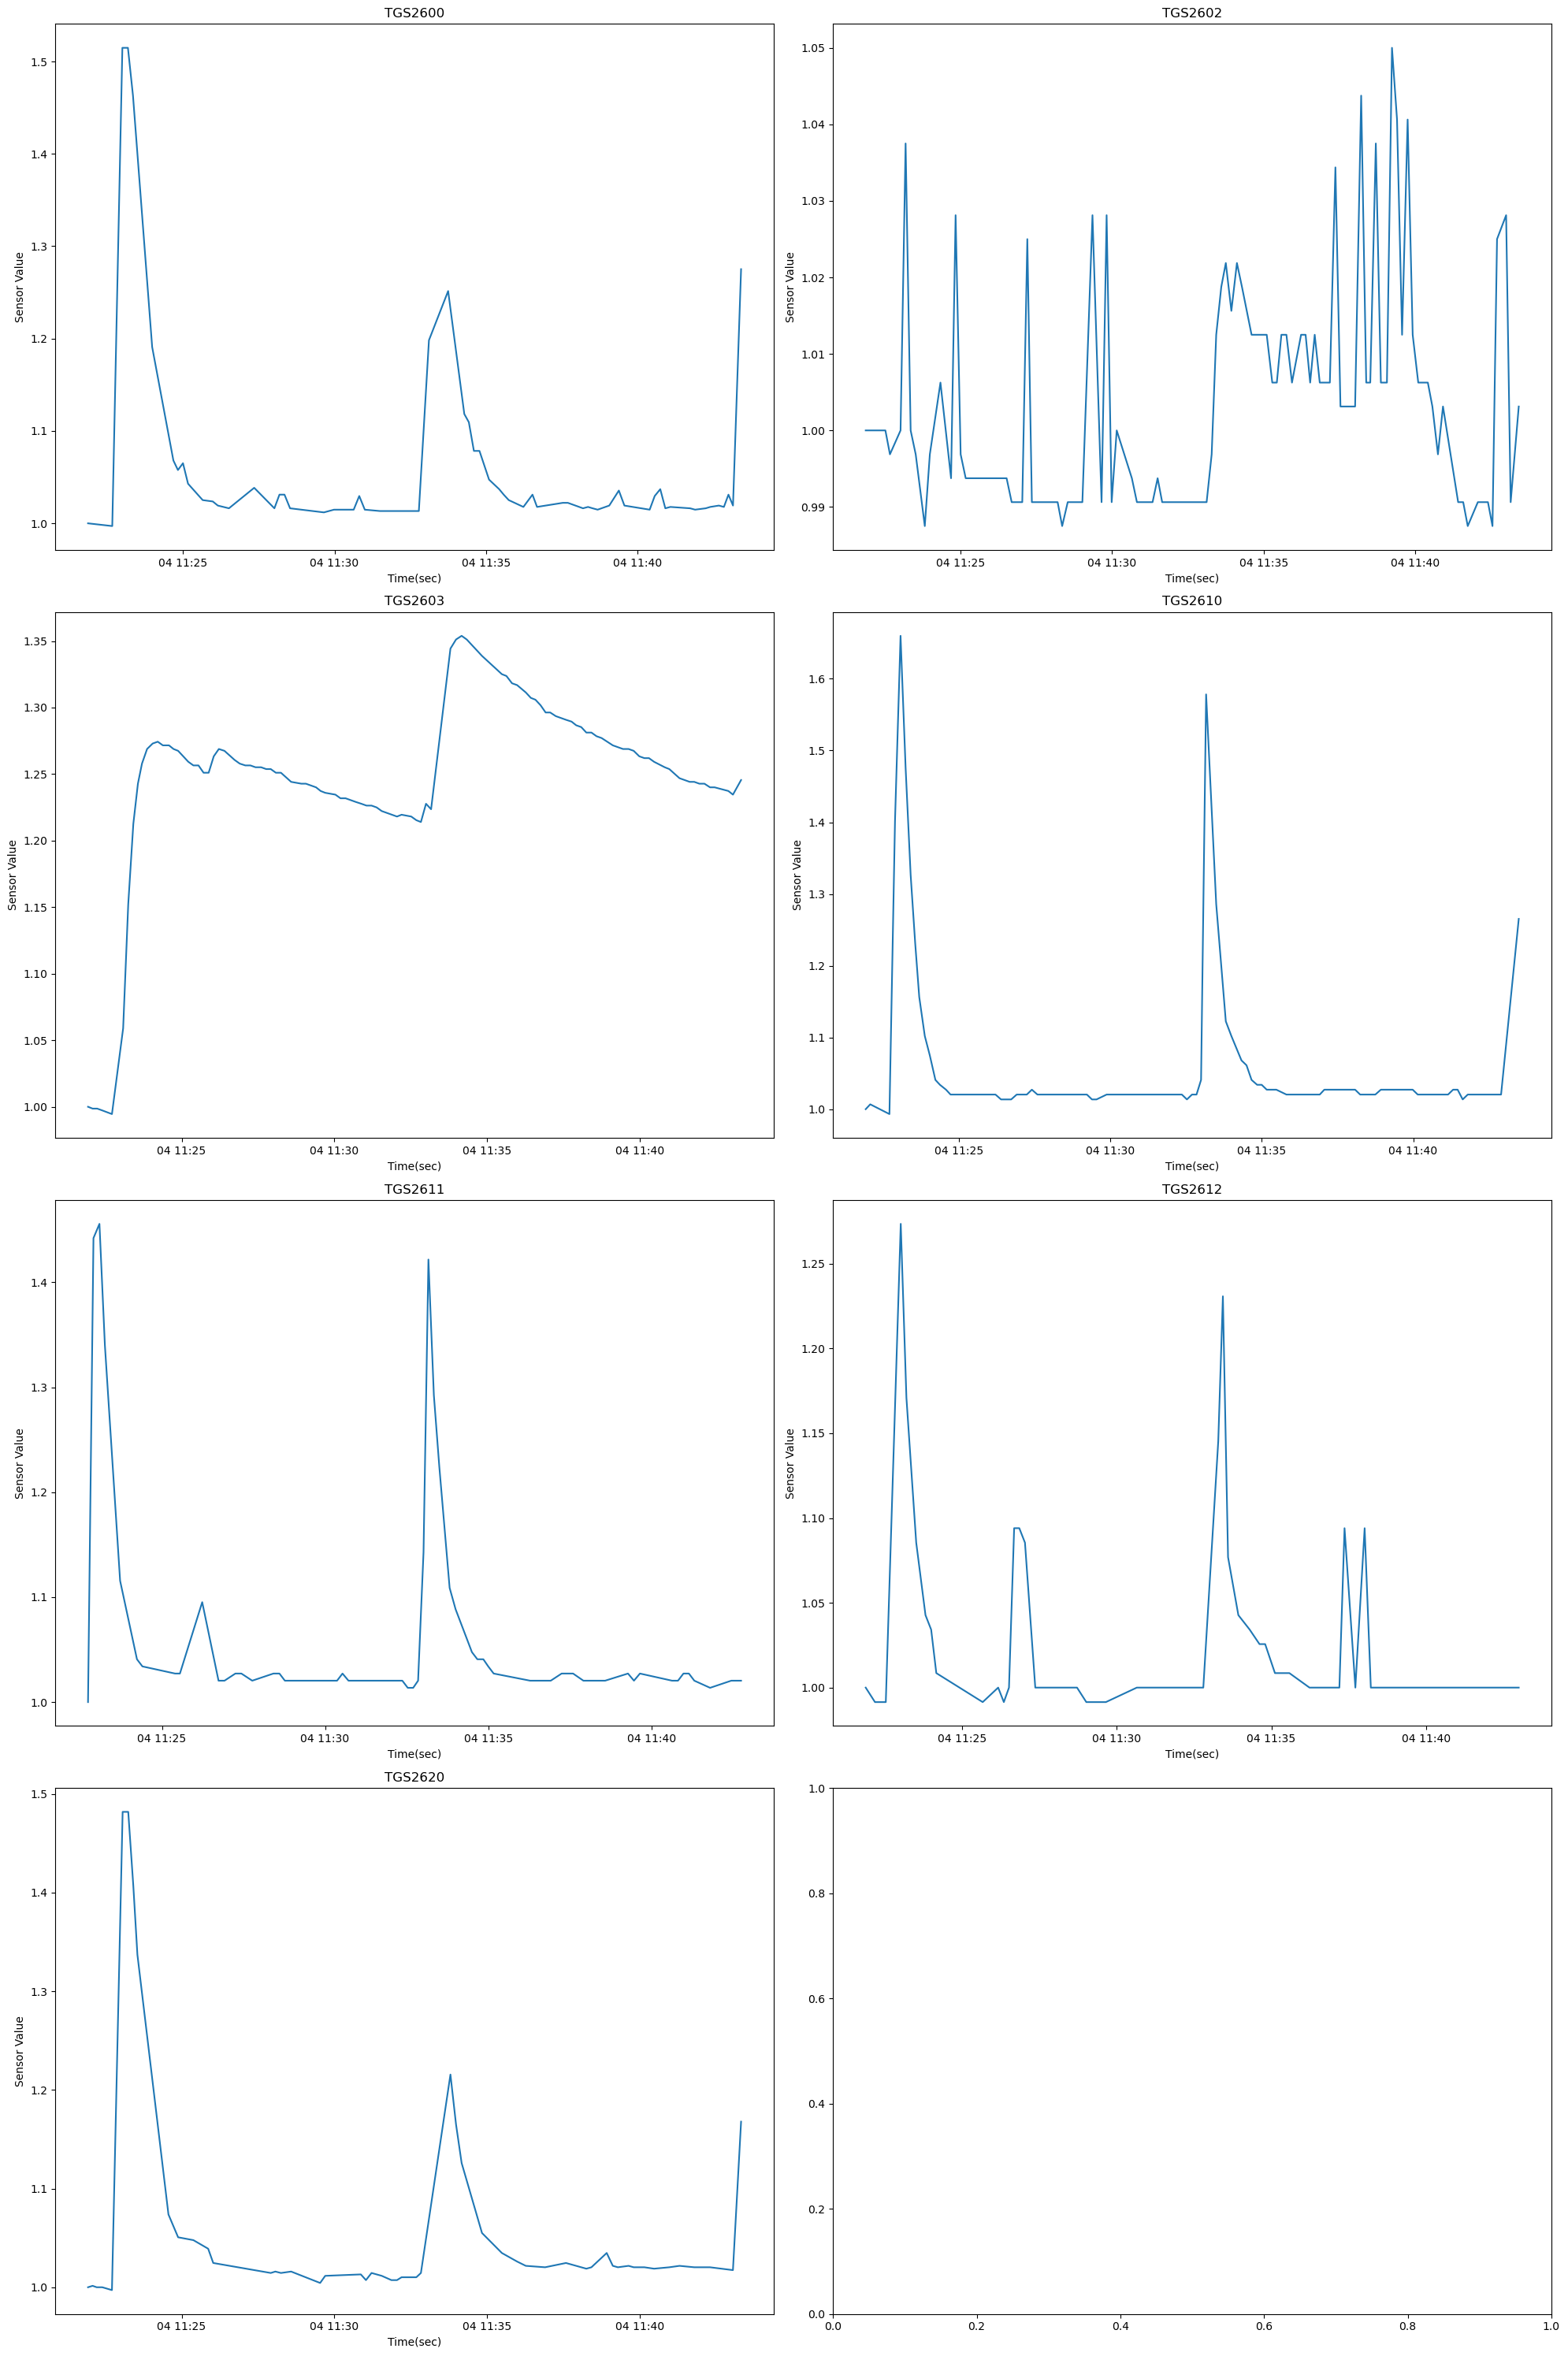

In [7]:
fig, axes = plt.subplots(nrows=len(sensor_dict)//2+1, ncols = 2, figsize=(20,30))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Time'],data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()